In [3]:
import sys

sys.path.append('../src') 
from app import get_api_data
api = get_api_data()


def get_code(value, dictionary):
    if value not in dictionary:
        dictionary[value] = len(dictionary) + 1
    return dictionary[value]

capital_codes = {}
subregion_codes = {}
language_codes = {}

for country in api:
    capital = ", ".join(country.get("capital", [])) if country.get("capital") else "None"
    get_code(capital, capital_codes)

    subregion = country.get("subregion", "None")
    get_code(subregion, subregion_codes)

    language = ", ".join(country.get("languages", {}).values()) if country.get("languages") else "None"
    get_code(language, language_codes)

print("Capital Codes:", capital_codes)
print("Subregion Codes:", subregion_codes)
print("Language Codes:", language_codes)


Capital Codes: {'Ulan Bator': 1, 'Panama City': 2, "Nuku'alofa": 3, 'Moroni': 4, 'Stockholm': 5, 'Conakry': 6, 'Suva': 7, 'Riyadh': 8, 'Nouméa': 9, 'Praia': 10, 'Flying Fish Cove': 11, 'Pretoria, Bloemfontein, Cape Town': 12, 'Tehran': 13, 'Baku': 14, 'Kathmandu': 15, 'Beirut': 16, 'Diego Garcia': 17, 'Juba': 18, 'São Tomé': 19, 'Chișinău': 20, 'Charlotte Amalie': 21, 'Kigali': 22, 'Podgorica': 23, 'Bishkek': 24, 'Gitega': 25, 'South Tarawa': 26, 'Bridgetown': 27, 'Andorra la Vella': 28, 'Astana': 29, 'Amman': 30, 'None': 31, 'Nicosia': 32, 'Jakarta': 33, 'San Salvador': 34, 'Mariehamn': 35, 'Bandar Seri Begawan': 36, 'Mata-Utu': 37, 'Tokyo': 38, 'Tallinn': 39, 'Saipan': 40, 'Ottawa': 41, 'Port-aux-Français': 42, 'Longyearbyen': 43, 'Abu Dhabi': 44, 'Gaborone': 45, 'Nouakchott': 46, 'El Aaiún': 47, 'Hagåtña': 48, 'Antananarivo': 49, 'Vientiane': 50, 'Mogadishu': 51, 'Port-au-Prince': 52, 'Stanley': 53, 'Prague': 54, 'Nassau': 55, 'Valletta': 56, 'Port Louis': 57, 'Islamabad': 58, 'Khar

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar CSV
df = pd.read_csv('paises_con_lat_lon.csv')

# Separar X e y
X = df.drop(columns=['region'])

# Codificar la variable y (region) según orden de aparición
y_cat = pd.Categorical(df['region'], categories=pd.unique(df['region']))
y_encoded = y_cat.codes

# Codificar variables categóricas en X
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

# Mostrar resultados
print(X_encoded.head())
print("Orden de regiones:", y_cat.categories)


   name.common  independent  unMember  capital  subregion  language  latitude  \
0           66         True      True       14          5         9   15.0000   
1           37         True      True      241         10        47    6.0000   
2          145         True      True      165         17       114   42.5000   
3           72         True      True      210          8        45  -17.7134   
4          226         True      True      223         12         5   34.0000   

   longitude  landlocked      area  population  borders  car.side  timezones  \
0     39.000       False  117600.0     5352000       90         1          5   
1     12.000       False  475442.0    26545864       66         1          2   
2     19.300       False   13812.0      621718       12         1          2   
3    178.065       False   18272.0      896444      159         0         26   
4      9.000       False  163610.0    11818618       95         1          2   

   continents  startOfWeek  
0  

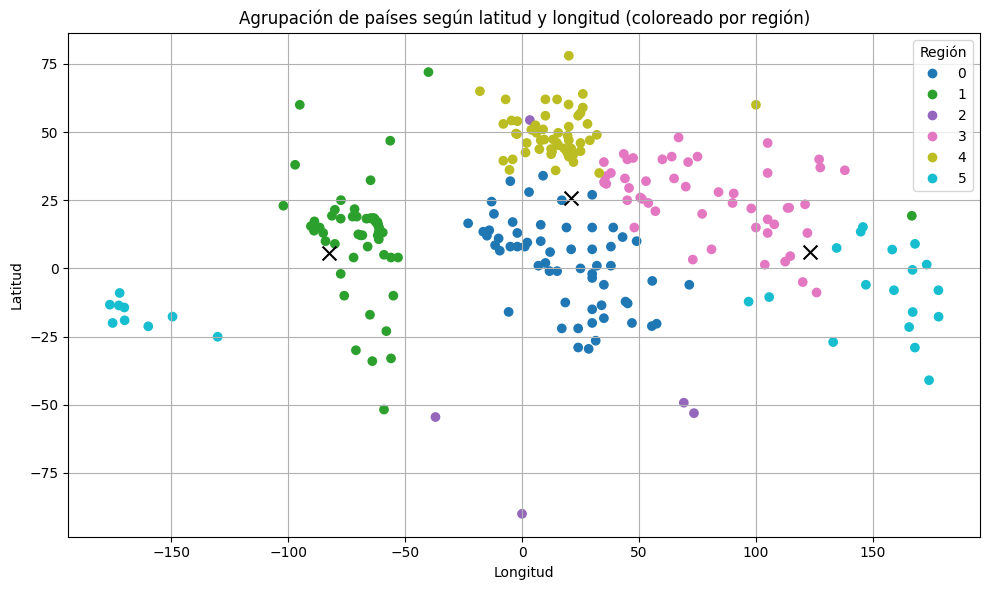

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar el archivo CSV
df = pd.read_csv("paises_con_lat_lon.csv")

# Definir X como latitud y longitud
X = df[['latitude', 'longitude']].copy()

# Mapear regiones a valores numéricos específicos
region_map = {
    'Africa': 0,
    'Americas': 1,
    'Antarctic': 2,
    'Asia': 3,
    'Europe': 4,
    'Oceania': 5
}
y = df['region'].map(region_map)

# Entrenar KMeans con 6 clusters (una por cada región esperada)
kmeans = KMeans(n_clusters=6, random_state=20)
kmeans.fit(X)
clusters = kmeans.labels_

# Graficar resultados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['longitude'], X['latitude'], c=y, cmap='tab10', label=y)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], 
            c='black', marker='x', s=100, label='Centroides')
plt.title('Agrupación de países según latitud y longitud (coloreado por región)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(*scatter.legend_elements(), title="Región")
plt.grid(True)
plt.tight_layout()
plt.show()


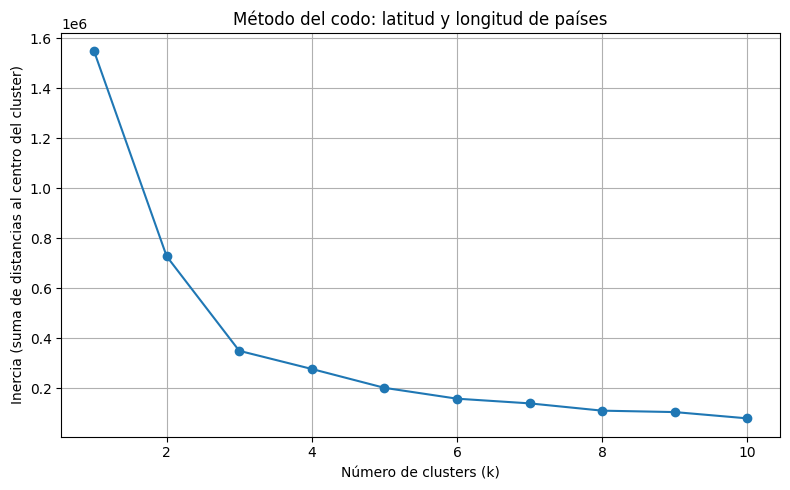

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Vuelvo a cargar el archivo porque el entorno se reinició
csv_path = "paises_con_lat_lon.csv"

# Intentar cargar el archivo nuevamente
df = pd.read_csv(csv_path)

    # Usamos solo latitud y longitud para X
X = df[['latitude', 'longitude']].copy()

    # Método del codo
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=20)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

    # Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del codo: latitud y longitud de países')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (suma de distancias al centro del cluster)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo CSV
df = pd.read_csv("paises_con_lat_lon.csv")

# Definir X y y
X = df[['independent', 'population']].copy()
y = df['unMember'].astype(int)  # Convertir True/False a 1/0

# Codificar la columna 'independent' (True/False -> 1/0)
X['independent'] = X['independent'].astype(int)

# Verificar el resultado
print(X.head())
print(y.head())


   independent  population
0            1     5352000
1            1    26545864
2            1      621718
3            1      896444
4            1    11818618
0    1
1    1
2    1
3    1
4    1
Name: unMember, dtype: int64


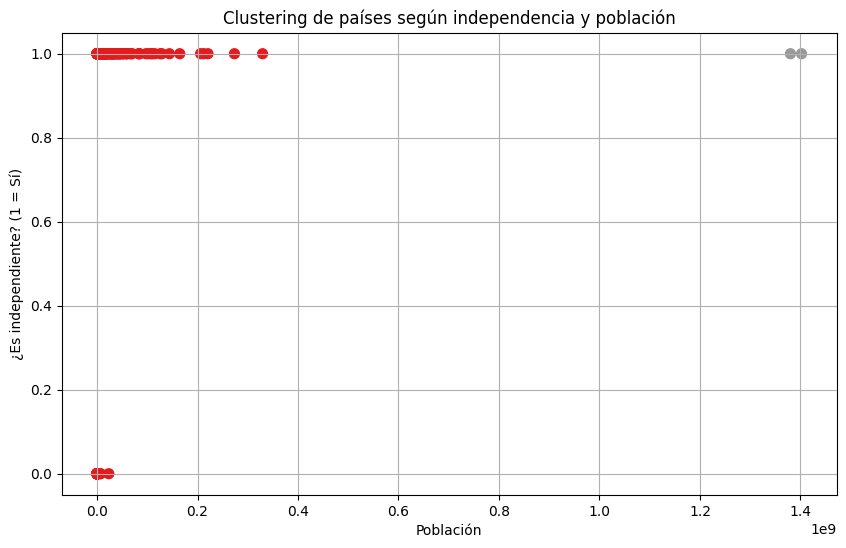

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("paises_con_lat_lon.csv")

# Definir X (independent, population) y codificar
X = df[['independent', 'population']].copy()
X['independent'] = X['independent'].astype(int)

# Definir y (miembro de la ONU)
y = df['unMember'].astype(int)

# Aplicar K-means con 2 clústeres (porque hay dos valores posibles en y)
kmeans = KMeans(n_clusters=2, random_state=20)
clusters = kmeans.fit_predict(X)

# Agregar los resultados al DataFrame
df['cluster'] = clusters

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X['population'], X['independent'], c=clusters, cmap='Set1', s=50)
plt.xlabel('Población')
plt.ylabel('¿Es independiente? (1 = Sí)')
plt.title('Clustering de países según independencia y población')
plt.grid(True)
plt.show()


In [6]:
from sklearn.metrics import accuracy_score

# y_real = datos reales de membresía ONU
y_real = y.values

# y_cluster = etiquetas del clustering
y_cluster = clusters

# Comparar directamente
acc1 = accuracy_score(y_real, y_cluster)

# Comparar con etiquetas invertidas (porque KMeans puede asignar 0 y 1 al revés)
acc2 = accuracy_score(y_real, 1 - y_cluster)

# Elegir la mejor coincidencia
mejor_accuracy = max(acc1, acc2)

print(f"Precisión del clustering comparado con 'unMember': {mejor_accuracy:.2%}")


Precisión del clustering comparado con 'unMember': 76.00%


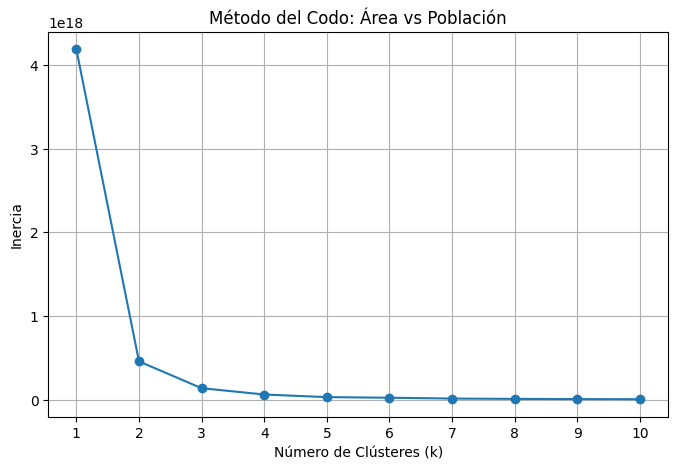

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("paises_con_lat_lon.csv")

# Definir X con las columnas 'area' y 'population'
X = df[['area', 'population']].dropna()

# Aplicar el método del codo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=20)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo: Área vs Población')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


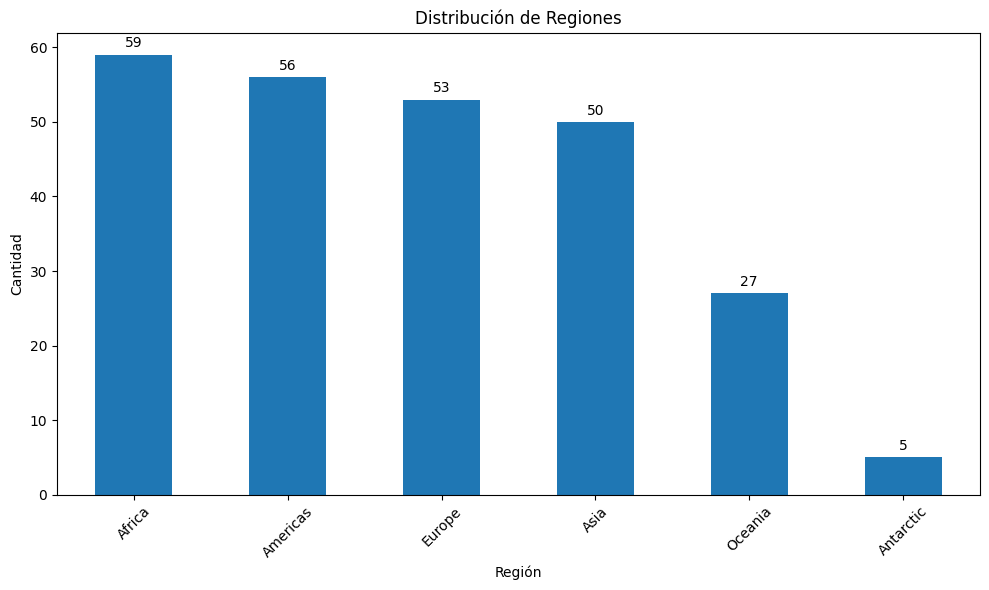

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV (reemplaza 'archivo.csv' con el nombre de tu archivo)
df = pd.read_csv('paises_con_lat_lon.csv')

# Contar la cantidad de ocurrencias por región
conteo_region = df['region'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10,6))
ax = conteo_region.plot(kind='bar')

# Etiquetas y título
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.title('Distribución de Regiones')
plt.xticks(rotation=45)

# Añadir cantidad total arriba de cada barra
for i, v in enumerate(conteo_region):
    ax.text(i, v + max(conteo_region)*0.01, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
